In [214]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter
from scipy.stats import gaussian_kde
import ast

In [215]:

# Function to load your data
def load_data(path):
    # Replace the following line with the actual path to your CSV file
    data = pd.read_csv(path)
    return data


In [216]:

file_path = 'Region_D265-12_nuclei.csv'
# file_path = 'Region_D115-40_nuclei.csv'
cell_sets_file_path = 'cell_sets.csv'
um_factor = 1.0

# Load the data
data = load_data(file_path)

# print total number of cells
print(f"Total number of cells: {len(data)}")


Total number of cells: 582399


In [217]:

# Calculate the distance from the cell to the nearest blood vessel
data['distance'] = np.sqrt((data['x'] - data['xv'])**2 + (data['y'] - data['yv'])**2)

# distance * um_factor
data['distance'] = data['distance'] * um_factor


In [218]:
display(data.head(4000))

,x,y,xv,yv,distance,type,group
0,2296.6,356.78,2319.3,497.84,142.874818,Mast Cell,Nuclei
1,2346.7,356.95,2319.3,497.84,143.529621,Mast Cell,Nuclei
2,2308.9,356.91,2319.3,497.84,141.313216,Mast Cell,Nuclei
3,2370.7,357.60,2319.3,497.84,149.362705,Mast Cell,Nuclei
4,2382.9,357.80,2406.2,504.36,148.400551,Mast Cell,Nuclei
...,...,...,...,...,...,...,...
3995,6410.1,1335.90,6406.3,1345.30,10.139033,Neutrophil,Nuclei
3996,6399.2,1337.40,6406.3,1345.30,10.621676,Neutrophil,Nuclei
3997,6519.5,1337.60,6533.9,1335.00,14.632840,Neutrophil,Nuclei
3998,6510.1,1339.40,6493.4,1343.40,17.172362,Neutrophil,Nuclei


In [219]:
data["type"].unique()

array(['Mast Cell', 'Macrophage', 'Neutrophil',
       'Type 2 Alveolar Epithelial Cell',
       'Type 1 Alveolar Epithelial Cell', 'CD8+ T Cell',
       'Smooth Muscle Cell', 'CD4+ T Cell', 'Basal Epithelial Cell',
       'B Cell', 'Lymphatic Endothelial Cell (and some immune cells)'],
      dtype=object)

In [220]:
data["type"] = data["type"].apply(lambda x: x.replace('Macrophage', 'CD68+ Macrophage'))
data["type"] = data["type"].apply(lambda x: x.replace('Neutrophil', 'MPO+'))

In [221]:
display(data.head(400))

,x,y,xv,yv,distance,type,group
0,2296.6,356.78,2319.3,497.84,142.874818,Mast Cell,Nuclei
1,2346.7,356.95,2319.3,497.84,143.529621,Mast Cell,Nuclei
2,2308.9,356.91,2319.3,497.84,141.313216,Mast Cell,Nuclei
3,2370.7,357.60,2319.3,497.84,149.362705,Mast Cell,Nuclei
4,2382.9,357.80,2406.2,504.36,148.400551,Mast Cell,Nuclei
...,...,...,...,...,...,...,...
395,2336.1,488.33,2319.3,497.84,19.304924,Type 1 Alveolar Epithelial Cell,Nuclei
396,2315.2,491.05,2319.3,497.84,7.931841,CD68+ Macrophage,Nuclei
397,2352.1,491.11,2319.3,497.84,33.483323,Type 1 Alveolar Epithelial Cell,Nuclei
398,2191.4,492.74,2182.6,546.27,54.248511,Type 1 Alveolar Epithelial Cell,Nuclei


In [222]:
data["type"].unique()

array(['Mast Cell', 'CD68+ Macrophage', 'MPO+',
       'Type 2 Alveolar Epithelial Cell',
       'Type 1 Alveolar Epithelial Cell', 'CD8+ T Cell',
       'Smooth Muscle Cell', 'CD4+ T Cell', 'Basal Epithelial Cell',
       'B Cell', 'Lymphatic Endothelial Cell (and some immune cells)'],
      dtype=object)

In [223]:

# remove those lines who distance is 0
data = data[data['distance'] != 0]

# Remove the top 1% of the data to exclude outliers
percentile_99 = np.percentile(data['distance'], 99.5)
data_filtered = data[data['distance'] <= percentile_99]

# Assuming data['distance'] is your data series
bin_width = 5
bin_range = np.arange(# start=data_filtered['distance'].min(), 
                      start=0,
                      stop=data_filtered['distance'].max() + bin_width, step=bin_width)


/tmp/ipykernel_917866/2725499107.py:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handle.append(mpatches.Patch(color = 'black', edgecolor='none', label='All Cells'))


[('Type 1 Alveolar Epithelial Cell', 293708), ('MPO+', 93568), ('Type 2 Alveolar Epithelial Cell', 76345), ('CD68+ Macrophage', 42506), ('Smooth Muscle Cell', 35799), ('CD4+ T Cell', 16839), ('Mast Cell', 13817), ('CD8+ T Cell', 3706), ('Lymphatic Endothelial Cell (and some immune cells)', 1761), ('Basal Epithelial Cell', 974), ('B Cell', 464)]
['B Cell', 'Basal Epithelial Cell', 'CD4+ T Cell', 'CD8+ T Cell', 'Endothelial', 'Lymphatic Endothelial Cell (and some immune cells)', 'CD68+ Macrophage', 'Mast Cell', 'MPO+', 'Smooth Muscle Cell', 'Type 1 Alveolar Epithelial Cell', 'Type 2 Alveolar Epithelial Cell', 'Blood endothelial', 'B Cell_link', 'Basal Epithelial Cell_link', 'CD4+ T Cell_link', 'CD8+ T Cell_link', 'Endothelial_link', 'Lymphatic Endothelial Cell (and some immune cells)_link', 'CD68+ Macrophage_link', 'Mast Cell_link', 'MPO+_link', 'Smooth Muscle Cell_link', 'Type 1 Alveolar Epithelial Cell_link', 'Type 2 Alveolar Epithelial Cell_link']
['[255, 127, 14]', '[44, 160, 44]', '

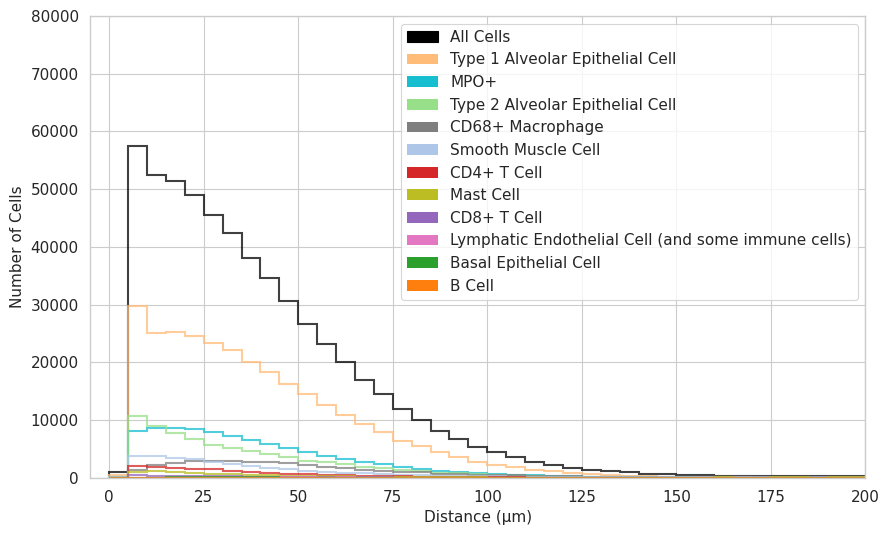

In [224]:
legend_handle = []
# Create the base figure and the first axis for the histogram
plt.figure(figsize=(10, 6))
# ax = plt.hist(data_filtered['distance'], bins=bin_range, alpha=0.4, label='All Cells')
ax = data_filtered['distance'].plot.hist(bins=bin_range, density=False, color='black',
                                          linewidth=1.5, alpha=0.75, label='All Cells', histtype='step')
# legend_handle.append(ax.patches[0])
legend_handle.append(mpatches.Patch(color = 'black', edgecolor='none', label='All Cells'))
plt.xlabel(u'Distance (\u03bcm)')
plt.ylabel('Number of Cells')
# plt.title('VCCF Histogram of Cell Distances [All / Top 5]')
# plt.grid(False)

# Save default x-axis limits for final formatting because the pandas kde
# plot uses much wider limits which usually decreases readability
xlim = ax.get_xlim()

# Find the 5 most frequent cell types in the filtered data
top_types_count = Counter(data_filtered['type']).most_common()
print(top_types_count)
original_len = len(top_types_count)

# if type is larger than 20, than remove any cell count that is less than 0.5% of the total count
if len(top_types_count) > 20:
    top_types_count = [type_ for type_ in top_types_count if type_[1] > len(data_filtered) * 0.005]
    # print how many cell types are removed
    print(f"Removed {original_len - len(top_types_count)} cell types < 0.5% of total count")
elif len(top_types_count) > 40:
    top_types_count = [type_ for type_ in top_types_count if type_[1] > len(data_filtered) * 0.01]
    # print how many cell types are removed
    print(f"Removed {original_len - len(top_types_count)} cell types < 1% of total count")

top_types = [type_[0] for type_ in top_types_count]

# Use 'tab10/Dark2/Set3' colormap
base_colors = plt.cm.tab10(np.linspace(0, 1, 10)) 
additional_colors1 = plt.cm.Dark2(np.linspace(0, 1, 8)) # Example to add more colors
additional_colors2 = plt.cm.Set3(np.linspace(0, 1, 12)) # Example to add more colors
all_colors = np.vstack([base_colors, additional_colors1, additional_colors2])  # Combine the color arrays

# Use colors based on cell_sets.csv file
cell_sets = load_data(cell_sets_file_path)

cell_sets["cell_type"] = cell_sets["cell_type"].apply(lambda x: x.replace('Macrophage', 'CD68+ Macrophage'))
cell_sets["cell_type"] = cell_sets["cell_type"].apply(lambda x: x.replace('Neutrophil', 'MPO+'))

print(cell_sets["cell_type"].to_list())
print(cell_sets["cell_color"].to_list())

def hexencode(rgb):
    rgb = ast.literal_eval(rgb)
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

# Draw the density curves on the second y-axis and find the maximum density value
for i in range(len(top_types)):
    cell_type = top_types[i]
    # line_color = all_colors[i] # Use this if you don't have a cell_sets.csv file and want to use default colors instead.
    line_color = hexencode(cell_sets.loc[cell_sets['cell_type'] == cell_type, 'cell_color'].values[0])
    
    subset = data_filtered[data_filtered['type'] == cell_type]
    # Plot pandas KDE
    # subset['distance'].plot.density(alpha=0.5, ax=ax) # same as df['var'].plot.kde()
    sub_ax = subset['distance'].hist(color=line_color ,bins=bin_range, density=False, linewidth=1.5, alpha=0.75, ax=ax, label=cell_type, histtype='step')
    legend_handle.append(mpatches.Patch(facecolor=line_color, edgecolor='none',label=cell_type))

print(xlim)
# ax.set_xlim(xlim)
ax.set_xlim((-5, 200))
print(ax.get_xlim())
print(ax.get_ylim())
ax.set_ylim((0.0, 80000))
print(ax.get_ylim())

# based on top_5_types counts, the length of the legend_col should be calculated to make sure each column has no more than 10 items
legend_col = len(top_types) // 15 + 1
font_size = 11
plt.legend(handles=legend_handle, ncol=legend_col, fontsize=font_size)


# plt.legend(fontsize=font_size)

plt.xlabel('Distance (\u03bcm)', fontsize=font_size)
plt.ylabel('Number of Cells', fontsize=font_size)

# Increase font size for all text in the figure
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.margins(0,0)
# plt.show()
plt.savefig(f"{file_path.split('.')[0]}_histogram.png", dpi=600)
plt.savefig(f"{file_path.split('.')[0]}_histogram.svg", dpi=600, format='svg')

In [13]:
#Violin Plots

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
import os

plt.rcParams["figure.figsize"] = (23,10)

In [138]:
# Load cell sets file
cell_sets_file_path = 'cell_sets.csv'
cell_sets = load_data(cell_sets_file_path)
um_factor = 1.0

# Load Healthy Dataset i.e. D1
file_path_healthy = "Region_D265-12_nuclei.csv"
df1 = load_data(file_path_healthy)

# Load Diseased Dataset i.e. D2
file_path_diseased = "Region_D115-40_nuclei.csv"
df2 = load_data(file_path_diseased)

# Compute Distances dor D1
# Calculate the distance from the cell to the nearest blood vessel
df1['distance'] = np.sqrt((df1['x'] - df1['xv'])**2 + (df1['y'] - df1['yv'])**2)

# distance * um_factor
df1['distance'] = df1['distance'] * um_factor

# Compute Distances for D2 
# Calculate the distance from the cell to the nearest blood vessel
df2['distance'] = np.sqrt((df2['x'] - df2['xv'])**2 + (df2['y'] - df2['yv'])**2)

# distance * um_factor
df2['distance'] = df2['distance'] * um_factor

# Add Column "Tissue Type" = "Healthy" to D1
df1["Tissue Type"] = "Healthy"

# Add Column "Tissue Type" = "Diseased" to D2 
df2["Tissue Type"] = "Diseased"

# Rename Macrophages and Nutrophils
df1["type"] = df1["type"].apply(lambda x: x.replace('Macrophage', 'CD68+ Macrophage'))
df1["type"] = df1["type"].apply(lambda x: x.replace('Neutrophil', 'MPO+'))

df2["type"] = df2["type"].apply(lambda x: x.replace('Macrophage', 'CD68+ Macrophage'))
df2["type"] = df2["type"].apply(lambda x: x.replace('Neutrophil', 'MPO+'))

# Drop 0 distances from D1
# remove those lines who distance is 0
df1 = df1[df1['distance'] != 0]

# Drop 0 distances from D2
# remove those lines who distance is 0
df2 = df2[df2['distance'] != 0]

# Merge the two dataframes
df_combined = pd.concat([df1, df2], ignore_index=True)


In [139]:
display(df_combined)

,x,y,xv,yv,distance,type,group,Tissue Type
0,2296.6,356.78,2319.3,497.84,142.874818,Mast Cell,Nuclei,Healthy
1,2346.7,356.95,2319.3,497.84,143.529621,Mast Cell,Nuclei,Healthy
2,2308.9,356.91,2319.3,497.84,141.313216,Mast Cell,Nuclei,Healthy
3,2370.7,357.60,2319.3,497.84,149.362705,Mast Cell,Nuclei,Healthy
4,2382.9,357.80,2406.2,504.36,148.400551,Mast Cell,Nuclei,Healthy
...,...,...,...,...,...,...,...,...
1146630,4563.4,16344.90,4520.7,16274.10,82.679683,CD68+ Macrophage,Nuclei,Diseased
1146631,4547.8,16344.70,4520.7,16274.10,75.622550,CD68+ Macrophage,Nuclei,Diseased
1146632,4540.9,16344.80,4520.7,16274.10,73.529110,CD68+ Macrophage,Nuclei,Diseased
1146633,4536.3,16346.30,4520.7,16274.10,73.866095,CD68+ Macrophage,Nuclei,Diseased


In [140]:
# Only keep cell types present in both datasets.
subset_cell_types = df2["type"].unique()
print(subset_cell_types)
subset_df = df_combined[df_combined['type'].isin(subset_cell_types)]

['CD68+ Macrophage' 'CD4+ T Cell' 'Smooth Muscle Cell' 'CD8+ T Cell'
 'Type 2 Alveolar Epithelial Cell' 'B Cell']


In [141]:
# Rename Column Names
subset_df = subset_df.rename(columns={'type': 'Cell Type'})
subset_df = subset_df.rename(columns={'distance': 'Distance (\u03bcm)'})

In [142]:
display(subset_df)

,x,y,xv,yv,Distance (μm),Cell Type,group,Tissue Type
11,2370.6,363.74,2319.3,497.84,143.577505,CD68+ Macrophage,Nuclei,Healthy
15,2382.4,364.33,2406.2,504.36,142.038167,CD68+ Macrophage,Nuclei,Healthy
17,2340.4,367.20,2319.3,497.84,132.332988,CD68+ Macrophage,Nuclei,Healthy
20,2360.1,368.61,2319.3,497.84,135.517648,CD68+ Macrophage,Nuclei,Healthy
21,2312.9,369.75,2319.3,497.84,128.249788,CD68+ Macrophage,Nuclei,Healthy
...,...,...,...,...,...,...,...,...
1146630,4563.4,16344.90,4520.7,16274.10,82.679683,CD68+ Macrophage,Nuclei,Diseased
1146631,4547.8,16344.70,4520.7,16274.10,75.622550,CD68+ Macrophage,Nuclei,Diseased
1146632,4540.9,16344.80,4520.7,16274.10,73.529110,CD68+ Macrophage,Nuclei,Diseased
1146633,4536.3,16346.30,4520.7,16274.10,73.866095,CD68+ Macrophage,Nuclei,Diseased


/tmp/ipykernel_917866/803197597.py:3: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  sns.violinplot(data=subset_df, x="Cell Type", y="Distance (\u03bcm)", scale="area", cut=0, inner="box", hue="Tissue Type", hue_order=["Diseased", "Healthy"], split=True, palette='Set1', alpha=.9)


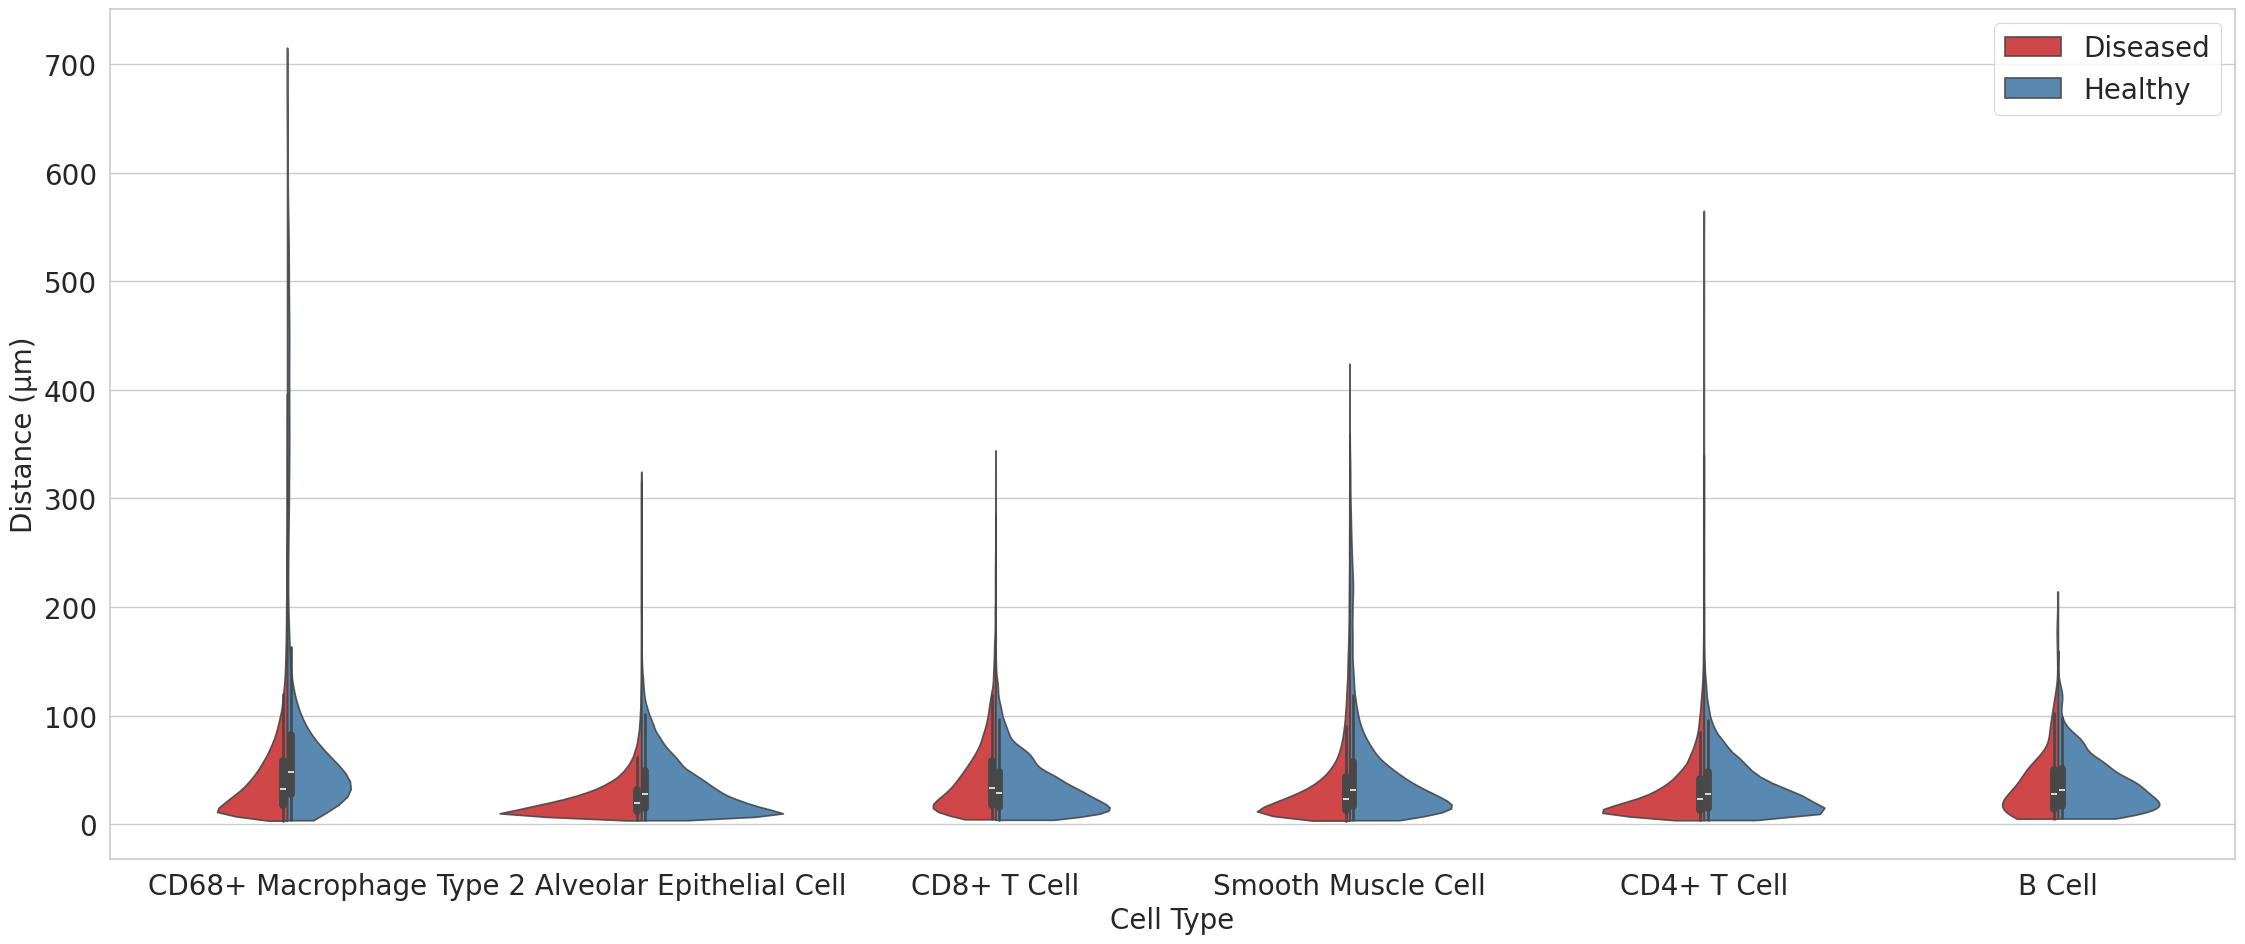

In [143]:
# Generate Violin Plot
sns.set_theme(style="whitegrid")
sns.violinplot(data=subset_df, x="Cell Type", y="Distance (\u03bcm)", scale="area", cut=0, inner="box", hue="Tissue Type", hue_order=["Diseased", "Healthy"], split=True, palette='Set1', alpha=.9)

sns.set_context("paper", rc={"font.size":25,"axes.titlesize":25,"axes.labelsize":25})
font_size = 20
plt.legend(fontsize=font_size)

plt.xlabel('Cell Type', fontsize=font_size)
plt.ylabel('Distance (\u03bcm)', fontsize=font_size)

# Increase font size for all text in the figure
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.tight_layout()
plt.savefig('violin_plot.svg', dpi=600, format='svg')
plt.savefig('violin_plot.png', dpi=600, format='png')